In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def moving_average(d, extra_periods = 1, n=3):
    
    #Historical period length
    cols = len(d)
    
    #Append np.nan into the demand array to cover future periods
    
    d = np.append(d, [np.nan]*extra_periods)
    
    # Define the forecast array
    
    f = np.full(cols + extra_periods, np.nan)
    
    # Ctreate all the t+1 forecast until end of historical period
    
    for t in range(n, cols):
        f[t] = np.mean(d[t-n:t])
        
    # Forecast for all extra periods 
    f[t+1:] = np.mean(d[t-n+1:t+1])
    
    # Return a DataFrame with the demand, forecast and error 
    
    df = pd.DataFrame.from_dict({'Demand': d, 'Forecast': f, 'Error':d-f})
    
    return df

In [2]:
d = [28, 19, 18, 13, 19, 16, 19, 18, 13, 16, 16, 11, 11, 18, 15, 13, 15, 13, 11, 13, 10, 12]

df = moving_average(d, extra_periods=4, n=3)

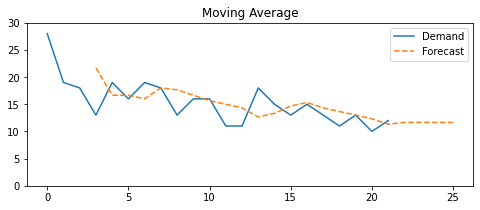

In [6]:
df[['Demand', 'Forecast']].plot(figsize=(8,3), title = 'Moving Average', ylim=(0,30), style=['-', '--'])
df.index.name='Period'

In [22]:
def kpi(df):
    ''' Calculate BIAS ablolute and scaled
        Calculate MAPE
        MAE absolute and scaled
        RMSE
    '''
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs / dem_ave
    print('Bias: {:0.2f}, {:.2%}'.format(bias_abs, bias_rel))
    
    MAPE = (df['Error'].abs()/df['Demand']).mean()
    print('MAPE: {:.2%}'.format(MAPE))
    
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs / dem_ave
    print('MAE: {:0.2f}, {:.2%}'.format(MAE_abs, MAE_rel))
    
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel = RMSE_abs / dem_ave
    print('RMSE: {:0.2f}, {:.2%}'.format(RMSE_abs, RMSE_rel))

In [23]:
d = [37, 60, 85, 112, 132, 145, 179, 198, 150, 132]
df = moving_average(d, extra_periods=4, n=3)
kpi(df)

Bias: 22.95, 15.33%
MAPE: 29.31%
MAE: 42.29, 28.24%
RMSE: 43.20, 28.85%
